In [1]:
install.packages("ISLR2")
install.packages("glmnet")
install.packages("keras")
install.packages("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ISLR2)
library(glmnet)
library(keras)
library(lubridate)

Loading required package: Matrix

Loaded glmnet 4.1-6

Loading required package: timechange

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [11]:
NYSE = read.csv('fullnightofdata.csv',header=FALSE)

In [12]:
dim(NYSE)

[1] 7950000       3

In [14]:
7950000*0.7

[1] 5565000

In [15]:
NYSE[,4] = TRUE
NYSE[c(5565001:7950000),4] = FALSE
colnames(NYSE) = c('EEG_Cz','EEG_Oz','EOG', 'train')
colnames(NYSE)

[1] "EEG_Cz" "EEG_Oz" "EOG"    "train"

In [16]:
lagm <- function(x, k = 1) {
  n <- nrow(x)
  pad <- matrix(NA, k, ncol(x))
  rbind(pad, x[1:(n - k), ])
}

In [17]:
xdata <- data.matrix(
 NYSE[, c("EEG_Cz","EEG_Oz", 'EOG')]
 )
istrain <- NYSE[, "train"]
xdata <- scale(xdata)

In [18]:
dim(xdata)

[1] 7950000       3

In [19]:
head(xdata)

EEG_Cz,EEG_Oz,EOG
0.18724275,-0.18523871,0.21339151
-0.10591762,0.15913234,0.20667133
0.04609146,-0.32802671,0.11930887
-0.09867909,-0.20203730,0.01178585
-0.20725700,-0.03405142,0.09242812
-0.29411933,-0.09284648,0.02522623


In [20]:
colnames(xdata)

[1] "EEG_Cz" "EEG_Oz" "EOG"

# 10-value repetition, EEG_Oz

In [36]:
udata = xdata
for(i in 1:nrow(xdata)){
  if(i %% 10 == 1){
    setter = udata[i,2]
  }
  udata[i,2] = setter
}

In [37]:
arframe <- data.frame(log_volume = xdata[, "EEG_Oz"],
   L1 = lagm(udata, 1), L2 = lagm(udata, 2),
   L3 = lagm(udata, 3), L4 = lagm(udata, 4),
   L5 = lagm(udata, 5)
 )
arframe <- arframe[-(1:5), ]
istrain <- istrain[-(1:5)]

In [38]:
arframe

,log_volume,L1.EEG_Cz,L1.EEG_Oz,L1.EOG,L2.EEG_Cz,L2.EEG_Oz,L2.EOG,L3.EEG_Cz,L3.EEG_Oz,L3.EOG,L4.EEG_Cz,L4.EEG_Oz,L4.EOG,L5.EEG_Cz,L5.EEG_Oz,L5.EOG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,-0.09284648,-0.20725700,-0.1852387,0.092428115,-0.09867909,-0.1852387,0.011785849,0.04609146,-0.1852387,0.119308871,-0.10591762,-0.1852387,0.206671325,0.18724275,-0.1852387,0.213391514
7,-0.05085001,-0.29411933,-0.1852387,0.025226227,-0.20725700,-0.1852387,0.092428115,-0.09867909,-0.1852387,0.011785849,0.04609146,-0.1852387,0.119308871,-0.10591762,-0.1852387,0.206671325
8,0.19272951,-0.32669270,-0.1852387,-0.008374717,-0.29411933,-0.1852387,0.025226227,-0.20725700,-0.1852387,0.092428115,-0.09867909,-0.1852387,0.011785849,0.04609146,-0.1852387,0.119308871
9,-0.04245072,-0.27240375,-0.1852387,-0.021815095,-0.32669270,-0.1852387,-0.008374717,-0.29411933,-0.1852387,0.025226227,-0.20725700,-0.1852387,0.092428115,-0.09867909,-0.1852387,0.011785849
10,-0.04245072,-0.14934878,-0.1852387,0.005065661,-0.27240375,-0.1852387,-0.021815095,-0.32669270,-0.1852387,-0.008374717,-0.29411933,-0.1852387,0.025226227,-0.20725700,-0.1852387,0.092428115
11,-0.89917869,-0.04439013,-0.1852387,0.058827171,-0.14934878,-0.1852387,0.005065661,-0.27240375,-0.1852387,-0.021815095,-0.32669270,-0.1852387,-0.008374717,-0.29411933,-0.1852387,0.025226227
12,-1.14275821,0.07866483,-0.8991787,-0.041975661,-0.04439013,-0.1852387,0.058827171,-0.14934878,-0.1852387,0.005065661,-0.27240375,-0.1852387,-0.021815095,-0.32669270,-0.1852387,-0.008374717
13,-0.91597728,0.07142631,-0.8991787,-0.082296794,0.07866483,-0.8991787,-0.041975661,-0.04439013,-0.1852387,0.058827171,-0.14934878,-0.1852387,0.005065661,-0.27240375,-0.1852387,-0.021815095
14,-0.34482530,0.05694925,-0.8991787,-0.109177549,0.07142631,-0.8991787,-0.082296794,0.07866483,-0.8991787,-0.041975661,-0.04439013,-0.1852387,0.058827171,-0.14934878,-0.1852387,0.005065661


In [39]:
n = nrow(arframe)
xrnn <- data.matrix(arframe[, -2])
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 7949995       5       3

In [40]:
model <- keras_model_sequential() %>%
   layer_simple_rnn(units = 12,
      input_shape = list(5, 3),
      dropout = 0.1, recurrent_dropout = 0.1) %>%
   layer_dense(units = 1)
model %>% compile(optimizer = optimizer_rmsprop(),
    loss = "mse")
history <- model %>% fit(
    xrnn[istrain,, ], arframe[istrain, "log_volume"],
    batch_size = 100, epochs = 5,
    validation_data =
      list(xrnn[!istrain,, ], arframe[!istrain, "log_volume"])
  )

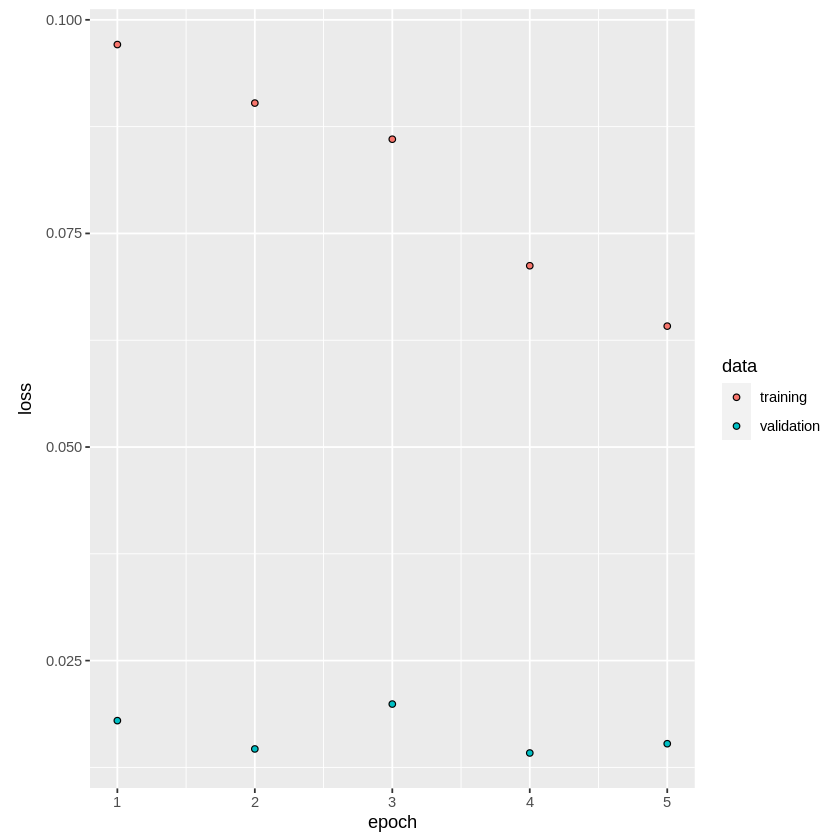

In [41]:
plot(history)
kpred <- predict(model, xrnn[!istrain,, ])

In [42]:
npred <- predict(model, xrnn[!istrain,, ])
1 - sum((npred - arframe[!istrain, "log_volume"])^2)/sum((mean(arframe[!istrain, "log_volume"]) - arframe[!istrain, "log_volume"])^2)
mean((npred - arframe[!istrain, "log_volume"])^2)

[1] 0.9802556

[1] 0.01527245

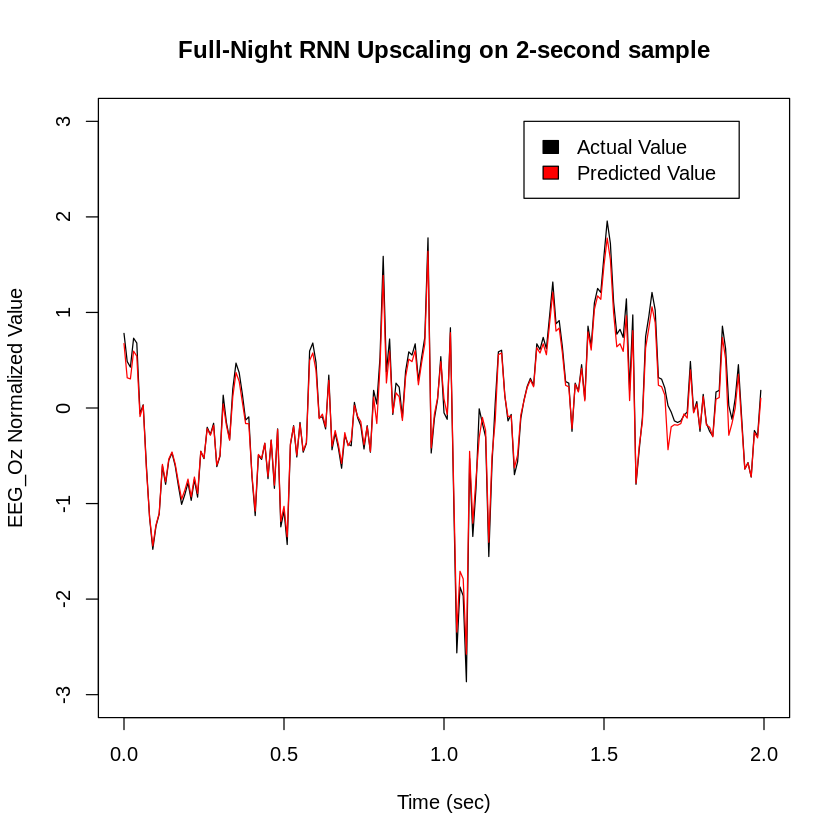

In [81]:

npred <- predict(model, xrnn[7949796:7949995,, ])
xvals=seq(from=0,to=(length(npred)-1)/100,by=0.01)
plot(xvals,y=xdata[7949801:7950000,'EEG_Oz'] ,col='black', type="l", main="Full-Night RNN Upscaling on 2-second sample",
  xlab="Time (sec)", ylab="EEG_Oz Normalized Value",
  xlim=c(0, 2), ylim=c(-3, 3))
lines(xvals,y=npred, type="l",col='red')
legend(1.25, 3, legend=c("Actual Value", "Predicted Value"), fill = c("black","red"))

In [63]:
length(seq(from=0,to=length(npred)/100,by=0.01))

[1] 201

In [48]:
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [51]:
data = cbind(as.vector(seq(from=0,to=10,by=(10/99))),cbind(npred))
data = as.data.frame(cbind(data, xdata[7949701:7950000,'EEG_Oz']))
colnames(data) = c('time','V1','V2')

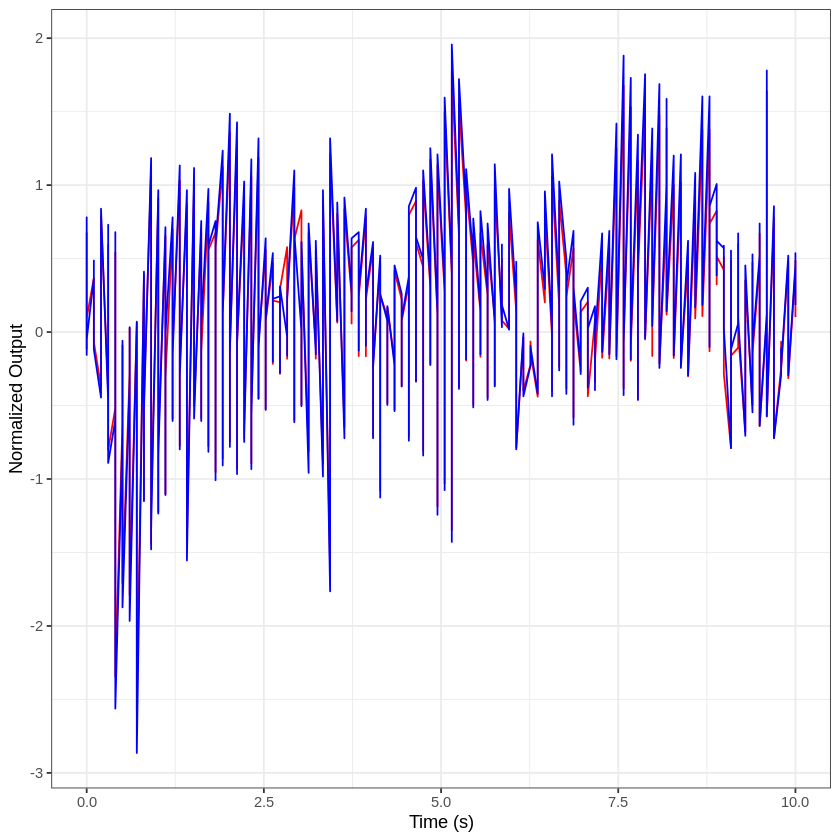

In [55]:
ggplot(data=data, mapping=aes(x=time),) + geom_line(mapping=aes(y=V1), colour='red') + geom_line(mapping=aes(y=V2), colour='blue') + theme_bw() + xlab("Time (s)") + ylab("Normalized Output")

# EOG

In [83]:
udata = xdata
for(i in 1:nrow(xdata)){
  if(i %% 10 == 1){
    setter = udata[i,3]
  }
  udata[i,3] = setter
}
arframe <- data.frame(log_volume = xdata[, "EOG"],
   L1 = lagm(udata, 1), L2 = lagm(udata, 2),
   L3 = lagm(udata, 3), L4 = lagm(udata, 4),
   L5 = lagm(udata, 5)
 )
arframe <- arframe[-(1:5), ]
istrain <- istrain[-(1:5)]


In [84]:
n = nrow(arframe)
xrnn <- data.matrix(arframe[, -2])
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 7949995       5       3

In [85]:
arframe

,log_volume,L1.EEG_Cz,L1.EEG_Oz,L1.EOG,L2.EEG_Cz,L2.EEG_Oz,L2.EOG,L3.EEG_Cz,L3.EEG_Oz,L3.EOG,L4.EEG_Cz,L4.EEG_Oz,L4.EOG,L5.EEG_Cz,L5.EEG_Oz,L5.EOG
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.025226227,-0.20725700,-0.03405142,0.21339151,-0.09867909,-0.20203730,0.21339151,0.04609146,-0.32802671,0.21339151,-0.10591762,0.15913234,0.21339151,0.18724275,-0.18523871,0.21339151
7,-0.008374717,-0.29411933,-0.09284648,0.21339151,-0.20725700,-0.03405142,0.21339151,-0.09867909,-0.20203730,0.21339151,0.04609146,-0.32802671,0.21339151,-0.10591762,0.15913234,0.21339151
8,-0.021815095,-0.32669270,-0.05085001,0.21339151,-0.29411933,-0.09284648,0.21339151,-0.20725700,-0.03405142,0.21339151,-0.09867909,-0.20203730,0.21339151,0.04609146,-0.32802671,0.21339151
9,0.005065661,-0.27240375,0.19272951,0.21339151,-0.32669270,-0.05085001,0.21339151,-0.29411933,-0.09284648,0.21339151,-0.20725700,-0.03405142,0.21339151,-0.09867909,-0.20203730,0.21339151
10,0.058827171,-0.14934878,-0.04245072,0.21339151,-0.27240375,0.19272951,0.21339151,-0.32669270,-0.05085001,0.21339151,-0.29411933,-0.09284648,0.21339151,-0.20725700,-0.03405142,0.21339151
11,-0.041975661,-0.04439013,-0.04245072,0.21339151,-0.14934878,-0.04245072,0.21339151,-0.27240375,0.19272951,0.21339151,-0.32669270,-0.05085001,0.21339151,-0.29411933,-0.09284648,0.21339151
12,-0.082296794,0.07866483,-0.89917869,-0.04197566,-0.04439013,-0.04245072,0.21339151,-0.14934878,-0.04245072,0.21339151,-0.27240375,0.19272951,0.21339151,-0.32669270,-0.05085001,0.21339151
13,-0.109177549,0.07142631,-1.14275821,-0.04197566,0.07866483,-0.89917869,-0.04197566,-0.04439013,-0.04245072,0.21339151,-0.14934878,-0.04245072,0.21339151,-0.27240375,0.19272951,0.21339151
14,-0.095737172,0.05694925,-0.91597728,-0.04197566,0.07142631,-1.14275821,-0.04197566,0.07866483,-0.89917869,-0.04197566,-0.04439013,-0.04245072,0.21339151,-0.14934878,-0.04245072,0.21339151


In [87]:
n = nrow(arframe)
xrnn <- data.matrix(arframe[, -2])
xrnn <- array(xrnn, c(n, 3, 5))
xrnn <- xrnn[,, 5:1]
xrnn <- aperm(xrnn, c(1, 3, 2))
dim(xrnn)

[1] 7949995       5       3

In [88]:
model <- keras_model_sequential() %>%
   layer_simple_rnn(units = 12,
      input_shape = list(5, 3),
      dropout = 0.1, recurrent_dropout = 0.1) %>%
   layer_dense(units = 1)
model %>% compile(optimizer = optimizer_rmsprop(),
    loss = "mse")
history <- model %>% fit(
    xrnn[istrain,, ], arframe[istrain, "log_volume"],
    batch_size = 100, epochs = 5,
    validation_data =
      list(xrnn[!istrain,, ], arframe[!istrain, "log_volume"])
  )

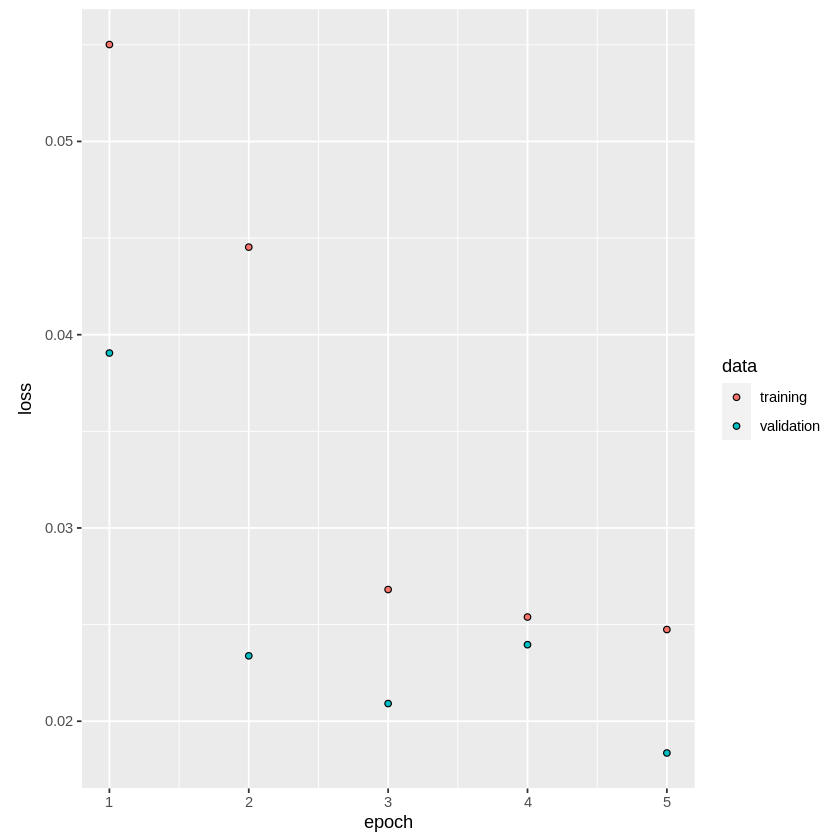

In [89]:
plot(history)
kpred <- predict(model, xrnn[!istrain,, ])

In [90]:
npred <- predict(model, xrnn[!istrain,, ])
1 - sum((npred - arframe[!istrain, "log_volume"])^2)/sum((mean(arframe[!istrain, "log_volume"]) - arframe[!istrain, "log_volume"])^2)
mean((npred - arframe[!istrain, "log_volume"])^2)

[1] 0.987314

[1] 0.01835618

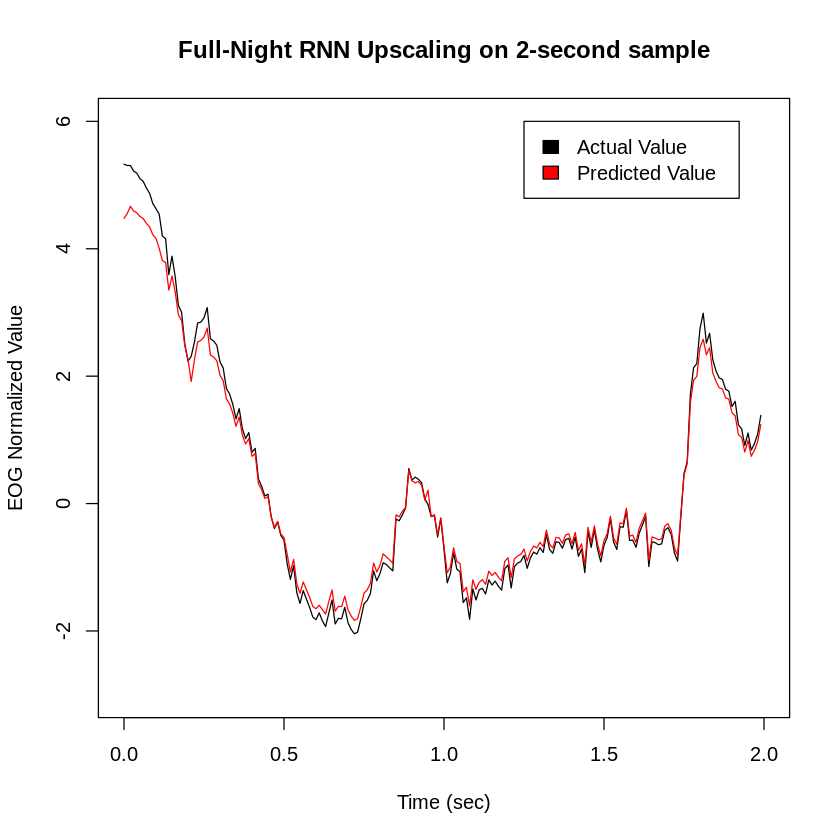

In [95]:

npred <- predict(model, xrnn[7949796:7949995,, ])
xvals=seq(from=0,to=(length(npred)-1)/100,by=0.01)
plot(xvals,y=xdata[7949801:7950000,'EOG'] ,col='black', type="l", main="Full-Night RNN Upscaling on 2-second sample",
  xlab="Time (sec)", ylab="EOG Normalized Value",
  xlim=c(0, 2), ylim=c(-3, 6))
lines(xvals,y=npred, type="l",col='red')
legend(1.25, 6, legend=c("Actual Value", "Predicted Value"), fill = c("black","red"))